In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import set_config
set_config(display='diagram')

In [1]:
data = pd.read_csv("Data/Concrete_without_Outliers.csv")
data.head()

<IPython.core.display.Javascript object>

,Cement,Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,120.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,120.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,120.0,44.30


In [5]:
target  = 'Compressive_Strength'
X = data.drop(labels=[target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=123
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (703, 8)
X_test shape: (302, 8)
y_train shape: (703,)
y_test shape: (302,)


In [6]:
pipe = Pipeline([
    ('yeo-johnson', PowerTransformer(method='yeo-johnson', standardize=False)),
    ('scaler', MinMaxScaler())
])

In [7]:
pipe

Pipeline(steps=[('yeo-johnson', PowerTransformer(standardize=False)),
                ('scaler', MinMaxScaler())])

In [8]:
X_train_processed = pipe.fit_transform(X_train)
X_test_processed = pipe.transform(X_test)

## Linear Regression

In [9]:
lr = LinearRegression()
lr.fit(X_train_processed, y_train)

LinearRegression()

In [10]:
y_train_pred = lr.predict(X_train_processed)
y_test_pred = lr.predict(X_test_processed)

In [11]:
mse_lr = metrics.mean_squared_error(y_test, y_test_pred)
rmse_lr = np.sqrt(mse_lr)
test_r2_score = metrics.r2_score(y_test, y_test_pred)

In [12]:
train_r2_score = metrics.r2_score(y_train, y_train_pred)

r2_diff = train_r2_score - test_r2_score

In [13]:
print('Mean Squared Error: ', mse_lr)
print('Root MSE: ', rmse_lr)
print('test_R2_Score: ', test_r2_score)
print('train_R2_Score: ', train_r2_score)
print('Difference in R2_score for train and test: ', r2_diff)

Mean Squared Error:  50.8049728971432
Root MSE:  7.127760721092088
test_R2_Score:  0.7929588471751577
train_R2_Score:  0.8142933724704049
Difference in R2_score for train and test:  0.021334525295247153


In [14]:
results_1 = pd.DataFrame({'Algorithm':['Linear Regression'],
                         "RMSE":rmse_lr,
                         "train_R2":train_r2_score,
                         "test_R2":test_r2_score,
                         "diff_R2":r2_diff},index=[1])

results = results_1[['Algorithm', 'RMSE', "train_R2", "test_R2", 'diff_R2']]
results

,Algorithm,RMSE,train_R2,test_R2,diff_R2
1,Linear Regression,7.127761,0.814293,0.792959,0.021335


In [15]:
rr = Ridge()
rr.fit(X_train_processed, y_train)

Ridge()

In [16]:
y_train_pred = rr.predict(X_train_processed)
y_test_pred = rr.predict(X_test_processed)

In [17]:
mse_rr = metrics.mean_squared_error(y_test, y_test_pred)
rmse_rr = np.sqrt(mse_rr)
test_r2_score = metrics.r2_score(y_test, y_test_pred)

In [18]:
train_r2_score = metrics.r2_score(y_train, y_train_pred)

r2_diff = train_r2_score - test_r2_score

In [19]:
print('Mean Squared Error: ', mse_rr)
print('Root MSE: ', rmse_rr)
print('test_R2_Score: ', test_r2_score)
print('train_R2_Score: ', train_r2_score)
print('Difference in R2_score for train and test: ', 
      train_r2_score - test_r2_score)

Mean Squared Error:  50.89247860142639
Root MSE:  7.133896452950967
test_R2_Score:  0.7926022426764167
train_R2_Score:  0.8136588109828324
Difference in R2_score for train and test:  0.02105656830641578


In [20]:
results_2 = pd.DataFrame({'Algorithm':['Ridge'],
                         "RMSE":rmse_rr,
                         "train_R2":train_r2_score,
                         "test_R2":test_r2_score,
                         "diff_R2":r2_diff}, index=[2])
results = pd.concat([results, results_2])

results = results[['Algorithm', 'RMSE', "train_R2", "test_R2", 'diff_R2']]
results

,Algorithm,RMSE,train_R2,test_R2,diff_R2
1,Linear Regression,7.127761,0.814293,0.792959,0.021335
2,Ridge,7.133896,0.813659,0.792602,0.021057


## Lasso 

In [21]:
lasso = Lasso()
lasso.fit(X_train_processed, y_train)

y_train_pred = lasso.predict(X_train_processed)
y_test_pred = lasso.predict(X_test_processed)

mse_lasso = metrics.mean_squared_error(y_test, y_test_pred)
rmse_lasso = np.sqrt(mse_lasso)
test_r2_score = metrics.r2_score(y_test, y_test_pred)

train_r2_score = metrics.r2_score(y_train, y_train_pred)

r2_diff = train_r2_score - test_r2_score

In [22]:
print('Mean Squared Error: ', mse_lasso)
print('Root MSE: ', rmse_lasso)
print('test_R2_Score: ', test_r2_score)
print('train_R2_Score: ', train_r2_score)
print('Difference in R2_score for train and test: ', 
      train_r2_score - test_r2_score)

Mean Squared Error:  103.45739931957878
Root MSE:  10.171401049982189
test_R2_Score:  0.5783889252977026
train_R2_Score:  0.5839857196587563
Difference in R2_score for train and test:  0.0055967943610537585


In [23]:
results_3 = pd.DataFrame({'Algorithm':['Lasso'],
                         "RMSE":rmse_lasso,
                         "train_R2":train_r2_score,
                         "test_R2":test_r2_score,
                         "diff_R2":r2_diff}, index=[3])
results = pd.concat([results, results_3])

results = results[['Algorithm', 'RMSE', "train_R2", "test_R2", 'diff_R2']]
results

,Algorithm,RMSE,train_R2,test_R2,diff_R2
1,Linear Regression,7.127761,0.814293,0.792959,0.021335
2,Ridge,7.133896,0.813659,0.792602,0.021057
3,Lasso,10.171401,0.583986,0.578389,0.005597


## Decision Tree

In [24]:
dt = DecisionTreeRegressor()
dt.fit(X_train_processed, y_train)

y_train_pred = dt.predict(X_train_processed)
y_test_pred = dt.predict(X_test_processed)

mse_dt = metrics.mean_squared_error(y_test, y_test_pred)
rmse_dt = np.sqrt(mse_dt)
test_r2_score = metrics.r2_score(y_test, y_test_pred)

train_r2_score = metrics.r2_score(y_train, y_train_pred)

r2_diff = train_r2_score - test_r2_score

In [25]:
print('Mean Squared Error: ', mse_dt)
print('Root MSE: ', rmse_dt)
print('test_R2_Score: ', test_r2_score)
print('train_R2_Score: ', train_r2_score)
print('Difference in R2_score for train and test: ', 
      train_r2_score - test_r2_score)

Mean Squared Error:  36.77232814569537
Root MSE:  6.0640191412705295
test_R2_Score:  0.8501448819439038
train_R2_Score:  0.9952331365883328
Difference in R2_score for train and test:  0.14508825464442898


In [26]:
results_4 = pd.DataFrame({'Algorithm':['Decision Tree'],
                         "RMSE":rmse_dt,
                         "train_R2":train_r2_score,
                         "test_R2":test_r2_score,
                         "diff_R2":r2_diff}, index=[4])
results = pd.concat([results, results_4])

results = results[['Algorithm', 'RMSE', "train_R2", "test_R2", 'diff_R2']]
results

,Algorithm,RMSE,train_R2,test_R2,diff_R2
1,Linear Regression,7.127761,0.814293,0.792959,0.021335
2,Ridge,7.133896,0.813659,0.792602,0.021057
3,Lasso,10.171401,0.583986,0.578389,0.005597
4,Decision Tree,6.064019,0.995233,0.850145,0.145088


## SVR

In [27]:
svr = SVR()
svr.fit(X_train_processed, y_train)

y_train_pred = svr.predict(X_train_processed)
y_test_pred = svr.predict(X_test_processed)

mse_svr = metrics.mean_squared_error(y_test, y_test_pred)
rmse_svr = np.sqrt(mse_svr)
test_r2_score = metrics.r2_score(y_test, y_test_pred)

train_r2_score = metrics.r2_score(y_train, y_train_pred)

r2_diff = train_r2_score - test_r2_score

In [28]:
print('Mean Squared Error: ', mse_svr)
print('Root MSE: ', rmse_svr)
print('test_R2_Score: ', test_r2_score)
print('train_R2_Score: ', train_r2_score)
print('Difference in R2_score for train and test: ', 
      train_r2_score - test_r2_score)

Mean Squared Error:  63.320659152189116
Root MSE:  7.957427923153883
test_R2_Score:  0.7419547433862461
train_R2_Score:  0.7788190200633267
Difference in R2_score for train and test:  0.03686427667708059


In [29]:
results_5 = pd.DataFrame({'Algorithm':['SVR'],
                         "RMSE":rmse_svr,
                         "train_R2":train_r2_score,
                         "test_R2":test_r2_score,
                         "diff_R2":r2_diff}, index=[5])
results = pd.concat([results, results_5])

results = results[['Algorithm', 'RMSE', "train_R2", "test_R2", 'diff_R2']]
results

,Algorithm,RMSE,train_R2,test_R2,diff_R2
1,Linear Regression,7.127761,0.814293,0.792959,0.021335
2,Ridge,7.133896,0.813659,0.792602,0.021057
3,Lasso,10.171401,0.583986,0.578389,0.005597
4,Decision Tree,6.064019,0.995233,0.850145,0.145088
5,SVR,7.957428,0.778819,0.741955,0.036864


## Random Forest

In [30]:
rf = RandomForestRegressor()
rf.fit(X_train_processed, y_train)

y_train_pred = rf.predict(X_train_processed)
y_test_pred = rf.predict(X_test_processed)

mse_rf = metrics.mean_squared_error(y_test, y_test_pred)
rmse_rf = np.sqrt(mse_rf)
test_r2_score = metrics.r2_score(y_test, y_test_pred)

train_r2_score = metrics.r2_score(y_train, y_train_pred)

r2_diff = train_r2_score - test_r2_score

In [31]:
print('Mean Squared Error: ', mse_rf)
print('Root MSE: ', rmse_rf)
print('test_R2_Score: ', test_r2_score)
print('train_R2_Score: ', train_r2_score)
print('Difference in R2_score for train and test: ', 
      train_r2_score - test_r2_score)

Mean Squared Error:  23.58311311493439
Root MSE:  4.856244754430566
test_R2_Score:  0.9038937598411901
train_R2_Score:  0.9806262385437269
Difference in R2_score for train and test:  0.07673247870253674


In [32]:
results_6 = pd.DataFrame({'Algorithm':['Random Forest'],
                         "RMSE":rmse_rf,
                         "train_R2":train_r2_score,
                         "test_R2":test_r2_score,
                         "diff_R2":r2_diff}, index=[6])
results = pd.concat([results, results_6])

results = results[['Algorithm', 'RMSE', "train_R2", "test_R2", 'diff_R2']]
results

,Algorithm,RMSE,train_R2,test_R2,diff_R2
1,Linear Regression,7.127761,0.814293,0.792959,0.021335
2,Ridge,7.133896,0.813659,0.792602,0.021057
3,Lasso,10.171401,0.583986,0.578389,0.005597
4,Decision Tree,6.064019,0.995233,0.850145,0.145088
5,SVR,7.957428,0.778819,0.741955,0.036864
6,Random Forest,4.856245,0.980626,0.903894,0.076732


## XGBoost

In [33]:
xg = XGBRegressor()
xg.fit(X_train_processed, y_train)

y_train_pred = xg.predict(X_train_processed)
y_test_pred = xg.predict(X_test_processed)

mse_xg = metrics.mean_squared_error(y_test, y_test_pred)
rmse_xg = np.sqrt(mse_xg)
test_r2_score = metrics.r2_score(y_test, y_test_pred)

train_r2_score = metrics.r2_score(y_train, y_train_pred)

r2_diff = train_r2_score - test_r2_score

In [34]:
print('Mean Squared Error: ', mse_xg)
print('Root MSE: ', rmse_xg)
print('test_R2_Score: ', test_r2_score)
print('train_R2_Score: ', train_r2_score)
print('Difference in R2_score for train and test: ', 
      train_r2_score - test_r2_score)

Mean Squared Error:  17.419733785157806
Root MSE:  4.173695459081533
test_R2_Score:  0.9290108515148184
train_R2_Score:  0.9948297911155417
Difference in R2_score for train and test:  0.06581893960072327


In [34]:
results_7 = pd.DataFrame({'Algorithm':['XGBoost'],
                         "RMSE":rmse_xg,
                         "train_R2":train_r2_score,
                         "test_R2":test_r2_score,
                         "diff_R2":r2_diff}, index=[7])
results = pd.concat([results, results_7])

results = results[['Algorithm', 'RMSE', "train_R2", "test_R2", 'diff_R2']]
results

,Algorithm,RMSE,train_R2,test_R2,diff_R2
1,Linear Regression,7.127761,0.814293,0.792959,0.021335
2,Ridge,7.133896,0.813659,0.792602,0.021057
3,Lasso,10.171401,0.583986,0.578389,0.005597
4,Decision Tree,6.064019,0.995233,0.850145,0.145088
5,SVR,7.957428,0.778819,0.741955,0.036864
6,Random Forest,4.856245,0.980626,0.903894,0.076732
7,XGBoost,4.173695,0.994830,0.929011,0.065819


In [35]:
results.sort_values(by=['test_R2', 'train_R2','diff_R2',"RMSE"],
                    ascending=[False, False, True, True])

,Algorithm,RMSE,train_R2,test_R2,diff_R2
7,XGBoost,4.173695,0.994830,0.929011,0.065819
6,Random Forest,4.856245,0.980626,0.903894,0.076732
4,Decision Tree,6.064019,0.995233,0.850145,0.145088
1,Linear Regression,7.127761,0.814293,0.792959,0.021335
2,Ridge,7.133896,0.813659,0.792602,0.021057
5,SVR,7.957428,0.778819,0.741955,0.036864
3,Lasso,10.171401,0.583986,0.578389,0.005597


For above results, clearly **XGBoost** and **Random Forest**, gives best results of all the possible model the dataset is applied on.

## HyperParameter Tuning

### Random Forest

In [37]:
param_grid = {
    "n_estimators":np.linspace(100, 1000,10, dtype=int),
    'max_depth':np.linspace(2,30,15),
    'criterion':['mse', 'mae']
}

In [38]:
grid = GridSearchCV(estimator=RandomForestRegressor(),
                   param_grid=param_grid,
                   cv=5,
                   return_train_score=True, verbose=4,
                   n_jobs=-1)

In [39]:
# grid.fit(X_train_processed, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
       28., 30.]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             return_train_score=True, verbose=4)

In [40]:
# best estimator
grid.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=20.0)

In [41]:
grid.best_params_

{'criterion': 'mse', 'max_depth': 20.0, 'n_estimators': 100}

In [42]:
rf_results_hp = pd.DataFrame(grid.cv_results_)

In [44]:
rf_results_hp.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.334376,0.007653,0.021855,0.007630,mse,2.0,100,"{'criterion': 'mse', 'max_depth': 2.0, 'n_esti...",0.513833,0.574129,...,0.530366,0.038990,289,0.573255,0.572006,0.542285,0.564238,0.558078,0.561972,0.011277
1,0.663974,0.015309,0.040626,0.007654,mse,2.0,200,"{'criterion': 'mse', 'max_depth': 2.0, 'n_esti...",0.515960,0.572997,...,0.528394,0.037146,290,0.575041,0.573159,0.539157,0.565852,0.558895,0.562421,0.012962
2,0.985848,0.011692,0.062501,0.000003,mse,2.0,300,"{'criterion': 'mse', 'max_depth': 2.0, 'n_esti...",0.520415,0.572287,...,0.531363,0.036270,287,0.581075,0.569175,0.542804,0.563511,0.558259,0.562965,0.012613
3,1.313989,0.015312,0.078122,0.000005,mse,2.0,400,"{'criterion': 'mse', 'max_depth': 2.0, 'n_esti...",0.518203,0.575213,...,0.533075,0.036360,282,0.577752,0.573113,0.541873,0.566108,0.561412,0.564052,0.012433
4,1.638431,0.014645,0.096875,0.006250,mse,2.0,500,"{'criterion': 'mse', 'max_depth': 2.0, 'n_esti...",0.517309,0.571645,...,0.531002,0.036599,288,0.578381,0.569913,0.541540,0.564252,0.559621,0.562741,0.012309


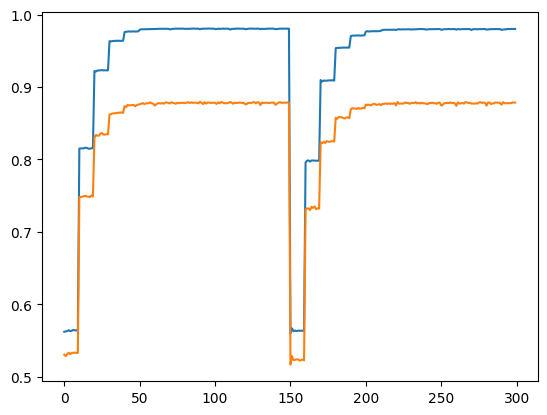

In [46]:
plt.plot(rf_results_hp['mean_train_score'])
plt.plot(rf_results_hp['mean_test_score'])

In [48]:
pivot_table = rf_results_hp.pivot_table(index='param_n_estimators', 
                                        columns=['param_max_depth'], 
                                        values='mean_test_score')

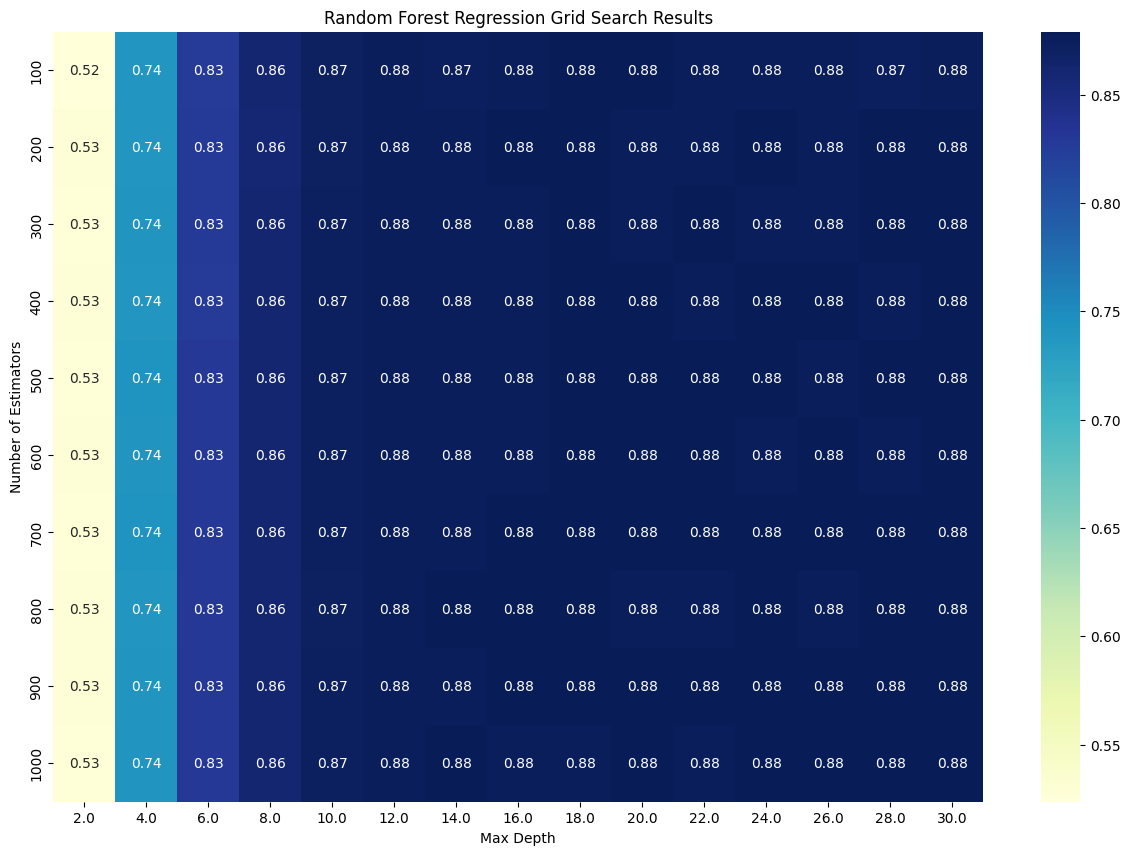

<Figure size 640x480 with 0 Axes>

In [58]:
# Create a heatmap of the pivot table
plt.figure(figsize=(15,10))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu')

# Add labels and title
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Random Forest Regression Grid Search Results')

# Show the plot
plt.show()
plt.tight_layout()

In [61]:
y_test_pred = grid.predict(X_test_processed)

In [62]:
y_train_pred = grid.predict(X_train_processed)

In [63]:
# mean squared error
mse_rf_hp = metrics.mean_squared_error(y_test, y_test_pred)
mse_rf_hp

23.623703280943943

In [64]:
# root mean squared error
rmse_rf_hp = np.sqrt(mse_rf_hp)
rmse_rf_hp

4.86042212991258

In [65]:
# r2 score for train data
r2_train_rf_hp = metrics.r2_score(y_train, y_train_pred)
r2_train_rf_hp

0.981592012116226

In [66]:
r2_test_rf_hp = metrics.r2_score(y_test, y_test_pred)
r2_test_rf_hp

0.9037283462156188

In [90]:
r2_diff = r2_train_rf_hp - r2_test_rf_hp
r2_diff

0.07786366590060723

In [91]:
results_8 = pd.DataFrame({'Algorithm':['Random_Forest_hp'],
                         "RMSE":rmse_rf_hp,
                         "train_R2":r2_train_rf_hp,
                         "test_R2":r2_test_rf_hp,
                         "diff_R2":r2_diff}, index=[8])
results = pd.concat([results, results_8])

results = results[['Algorithm', 'RMSE', "train_R2", "test_R2", 'diff_R2']]
results

,Algorithm,RMSE,train_R2,test_R2,diff_R2
1,Linear Regression,7.127761,0.814293,0.792959,0.021335
2,Ridge,7.133896,0.813659,0.792602,0.021057
3,Lasso,10.171401,0.583986,0.578389,0.005597
4,Decision Tree,6.322161,0.995233,0.837115,0.158118
5,SVR,7.957428,0.778819,0.741955,0.036864
6,Random Forest,4.746714,0.981075,0.908180,0.072895
7,XGBoost,4.173695,0.994830,0.929011,0.065819
8,Random_Forest_hp,4.860422,0.981592,0.903728,0.077864


###  XGBoost

In [72]:
param_grid = {
    "n_estimators": np.linspace(100, 1000, 10, dtype=int),
    'max_depth': np.linspace(2, 30, 15, dtype=int),
    'learning_rate': np.linspace(0.1, 1.0, 10)
}

In [73]:
grid = GridSearchCV(estimator=XGBRegressor(),
                    param_grid=param_grid,
                    cv=5,
                    return_train_score=True,
                    verbose=4)

In [76]:
# grid.fit(X_train_processed, y_train)

In [78]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [77]:
# best paramters
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}

In [79]:
y_test_pred = grid.predict(X_test_processed)

In [80]:
y_train_pred = grid.predict(X_train_processed)

In [81]:
# mean squared error
mse_xg_hp = metrics.mean_squared_error(y_test, y_test_pred)
mse_xg_hp

16.07861357070288

In [82]:
# root mean squared error
rmse_xg_hp = np.sqrt(mse_xg_hp)
rmse_xg_hp

4.00981465540527

In [83]:
# r2 score for train data
r2_train_xg_hp = metrics.r2_score(y_train, y_train_pred)
r2_train_xg_hp

0.9741111405905741

In [84]:
r2_test_xg_hp = metrics.r2_score(y_test, y_test_pred)
r2_test_xg_hp

0.9344762038109331

In [92]:
r2_diff = r2_train_xg_hp - r2_test_xg_hp
r2_diff

0.03963493677964103

In [87]:
xg_results_hp = pd.DataFrame(grid.cv_results_)

In [88]:
xg_results_hp.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.068742,0.007646,0.003125,0.006249,0.1,2,100,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.845801,0.863651,...,0.864191,0.021417,839,0.912633,0.911491,0.907359,0.909484,0.910928,0.910379,0.001819
1,0.103127,0.007653,0.006249,0.007653,0.1,2,200,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.881255,0.894253,...,0.891502,0.018135,359,0.942505,0.946081,0.942782,0.942557,0.944152,0.943615,0.001372
2,0.174998,0.011692,0.006250,0.007655,0.1,2,300,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.898099,0.903551,...,0.901832,0.015996,73,0.955026,0.959070,0.956522,0.955767,0.957021,0.956681,0.001373
3,0.228122,0.012497,0.006253,0.007659,0.1,2,400,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.906487,0.906489,...,0.905783,0.015752,32,0.962084,0.966356,0.963634,0.962490,0.963487,0.963610,0.001493
4,0.268750,0.006250,0.006250,0.007655,0.1,2,500,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.911377,0.908529,...,0.907834,0.015931,18,0.966312,0.971035,0.968180,0.966899,0.967717,0.968029,0.001636


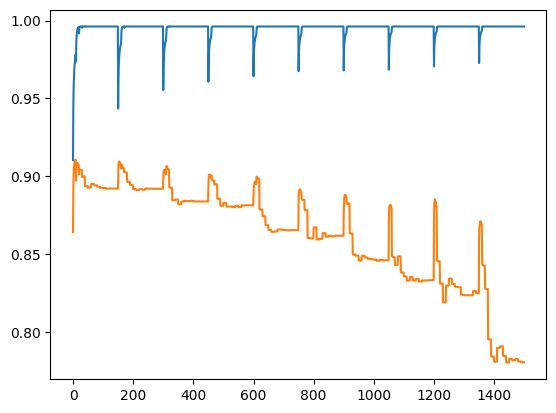

In [89]:
plt.plot(xg_results_hp['mean_train_score'])
plt.plot(xg_results_hp['mean_test_score'])

In [134]:
pivot_table = xg_results_hp.pivot_table(index='param_n_estimators', 
                                        columns=['param_max_depth'], 
                                        values='mean_test_score')

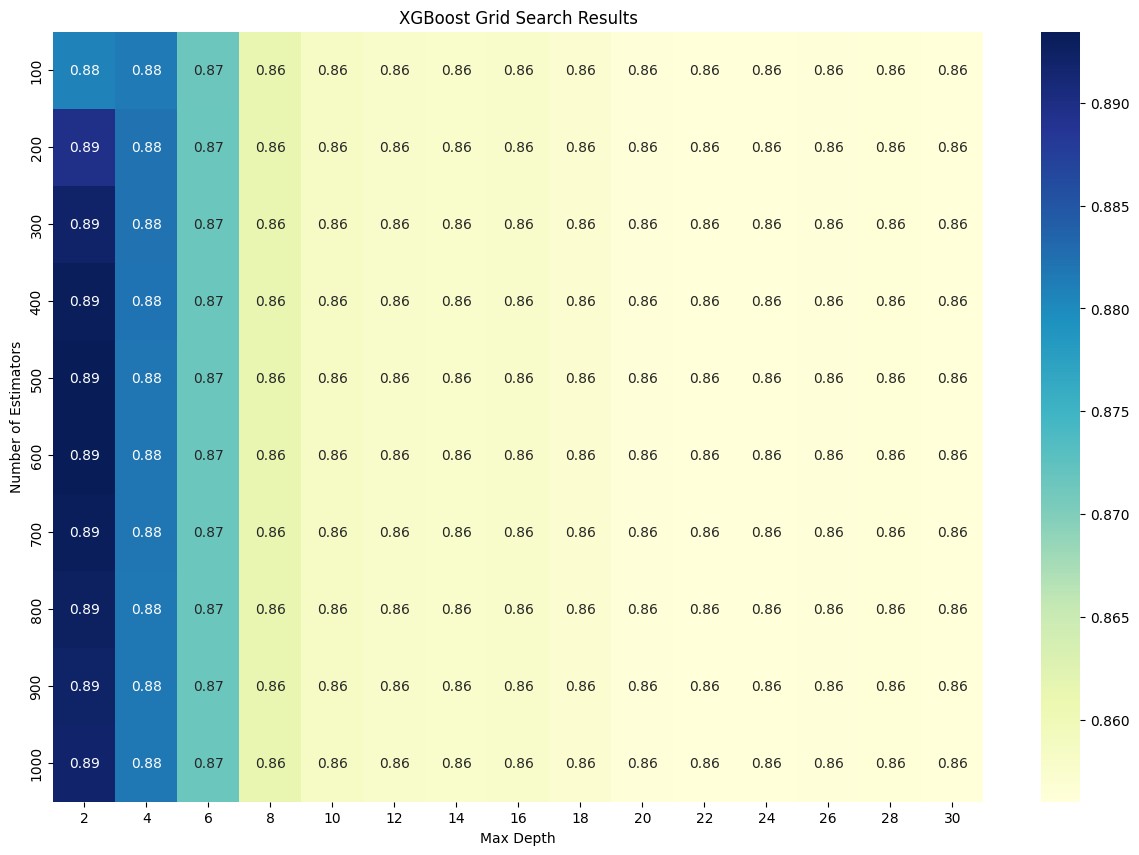

<Figure size 640x480 with 0 Axes>

In [136]:
# Create a heatmap of the pivot table
plt.figure(figsize=(15,10))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu')

# Add labels and title
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('XGBoost Grid Search Results')

# Show the plot
plt.show()
plt.tight_layout()

In [93]:
results_9 = pd.DataFrame({'Algorithm':['XGBoost_hp'],
                         "RMSE":rmse_xg_hp,
                         "train_R2":r2_train_xg_hp,
                         "test_R2":r2_test_xg_hp,
                         "diff_R2":r2_diff}, index=[9])
results = pd.concat([results, results_9])

results = results[['Algorithm', 'RMSE', "train_R2", "test_R2", 'diff_R2']]
results

,Algorithm,RMSE,train_R2,test_R2,diff_R2
1,Linear Regression,7.127761,0.814293,0.792959,0.021335
2,Ridge,7.133896,0.813659,0.792602,0.021057
3,Lasso,10.171401,0.583986,0.578389,0.005597
4,Decision Tree,6.322161,0.995233,0.837115,0.158118
5,SVR,7.957428,0.778819,0.741955,0.036864
6,Random Forest,4.746714,0.981075,0.908180,0.072895
7,XGBoost,4.173695,0.994830,0.929011,0.065819
8,Random_Forest_hp,4.860422,0.981592,0.903728,0.077864
9,XGBoost_hp,4.009815,0.974111,0.934476,0.039635


In [95]:
results.sort_values(by=['test_R2', 'train_R2','diff_R2',"RMSE"],
                    ascending=[False, False, True, True])

,Algorithm,RMSE,train_R2,test_R2,diff_R2
9,XGBoost_hp,4.009815,0.974111,0.934476,0.039635
7,XGBoost,4.173695,0.994830,0.929011,0.065819
6,Random Forest,4.746714,0.981075,0.908180,0.072895
8,Random_Forest_hp,4.860422,0.981592,0.903728,0.077864
4,Decision Tree,6.322161,0.995233,0.837115,0.158118
1,Linear Regression,7.127761,0.814293,0.792959,0.021335
2,Ridge,7.133896,0.813659,0.792602,0.021057
5,SVR,7.957428,0.778819,0.741955,0.036864
3,Lasso,10.171401,0.583986,0.578389,0.005597


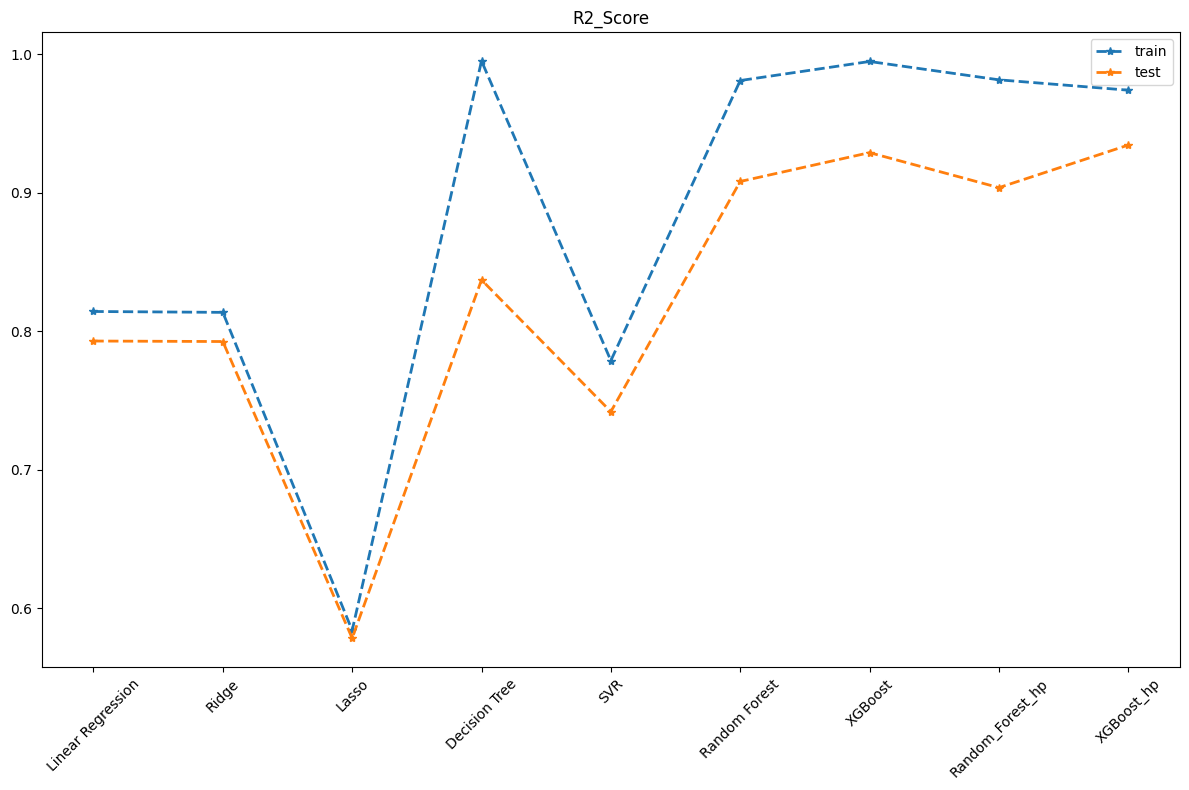

In [142]:
model_names = list(results['Algorithm'])
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(results['train_R2'], '*--', linewidth=2, label='train')
ax.plot(results['test_R2'], '*--', linewidth=2, label='test')
ax.set_xticks([1,2,3,4,5,6,7,8,9], model_names, rotation='45')
ax.legend()
ax.set_title('R2_Score')
plt.tight_layout();

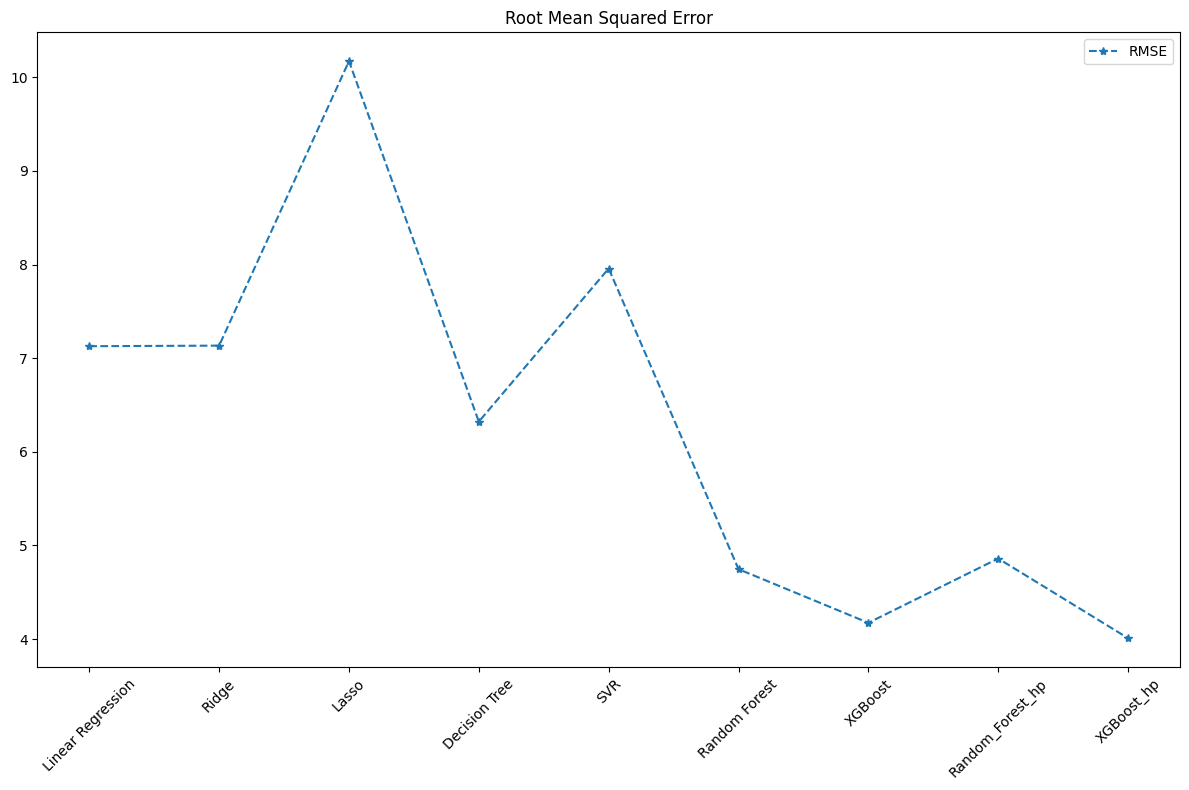

In [144]:
model_names = list(results['Algorithm'])
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(results['RMSE'],'*--', label='RMSE')
ax.set_xticks([1,2,3,4,5,6,7,8,9], model_names, rotation='45')
ax.set_title('Root Mean Squared Error')
ax.legend()
plt.tight_layout();

## Conclusion

**Problem Statement**: Predict the Concrete Compressive Strength by testing various models and selecting best from those models.

At first, we tested 7 models, and we selected 2 best models (random forest, and xgboost) and performed hyperparameter tuning on them along with cross validation.

**Best estimators for random forest**: 

{'criterion': 'mse', 'max_depth': 20.0, 'n_estimators': 100}

**Best estimators for XGBoost**:

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}

In [137]:
results.sort_values(by=['test_R2', 'train_R2','diff_R2',"RMSE"],
                    ascending=[False, False, True, True])

,Algorithm,RMSE,train_R2,test_R2,diff_R2
9,XGBoost_hp,4.009815,0.974111,0.934476,0.039635
7,XGBoost,4.173695,0.994830,0.929011,0.065819
6,Random Forest,4.746714,0.981075,0.908180,0.072895
8,Random_Forest_hp,4.860422,0.981592,0.903728,0.077864
4,Decision Tree,6.322161,0.995233,0.837115,0.158118
1,Linear Regression,7.127761,0.814293,0.792959,0.021335
2,Ridge,7.133896,0.813659,0.792602,0.021057
5,SVR,7.957428,0.778819,0.741955,0.036864
3,Lasso,10.171401,0.583986,0.578389,0.005597


FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.